In [5]:
using Plots
using TimeIt
using KernelDensity
include("BPS.jl") 
include("NRG.jl")

NRG_ss (generic function with 5 methods)

#### Initialise a few things first

In [6]:
d, Nobs = 50, 500
c = 0.5
α_true = simulate_α(c, Nobs)
β_true = -ones(d)/10;

In [7]:
X = rand(d, Nobs)
y = [rand(1)[1] < 1/(1 + exp(-α_true[i]-dot(β_true,X[:,i]))) for i in 1:Nobs] .+ 0
mean(y)

0.118

In [8]:
α_0, β_0 = copy(α_true), copy(β_true)
max_times = [ones(Nobs); 2*ones(d)]
mb_size = 1
modprint = 10
include_α, replace, Print = true, false, true
σ_α, σ_β = 2, 2

(2, 2)

### Our method:

5.02 minutes to run 
862.5 bounces on average

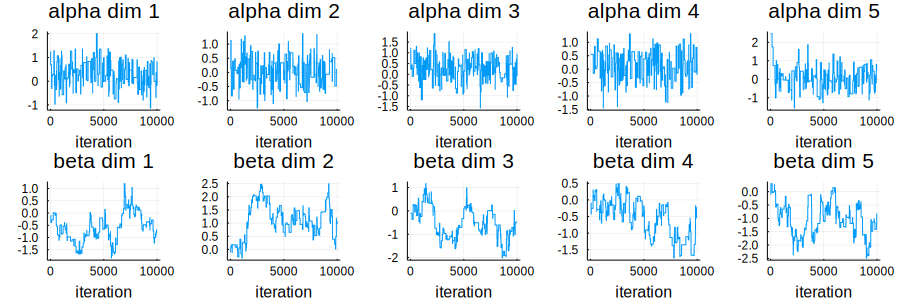

In [9]:
start = time()
ξ_traj, abounce_counter, bounce_counter = NRG_ss(X, y, 10^5, max_times, α_0, β_0, mb_size, 
                                                 c, σ_α, σ_β, modprint, include_α, replace)  
print( round((time()-start)/60, 2), " minutes to run \n")
print(round(mean(bounce_counter),1), " bounces on average")
plot_traj(ξ_traj, Nobs)

### BPS with same number of gradient evaluations:

In [6]:
max_bounces = Int(round(mean(bounce_counter)))
max_attempts = 10^6;

#### No refreshment:

5.0% of bounces accepted 
0.88 minutes to run 
0 refreshments, 872 bounces.

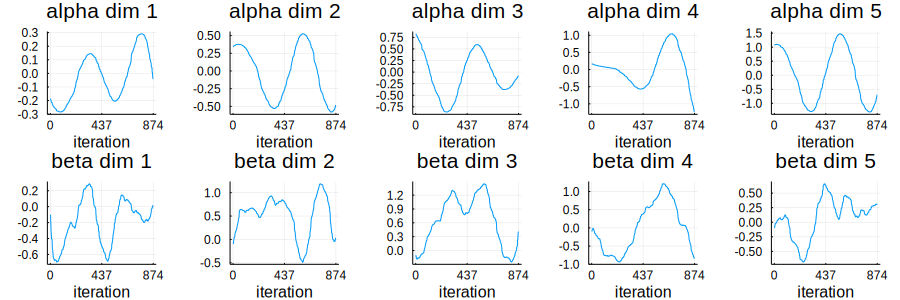

In [7]:
λ_ref = 0

start = time()
s_BPS, b_BPS, refreshments, bounces = BPS_ss(X, y, max_attempts, max_bounces, mb_size, α_0, β_0, c, σ_α, σ_β, λ_ref)
print( round((time()-start)/60, 2), " minutes to run \n")
print(refreshments, " refreshments, ", bounces, " bounces.")
plot_traj(s_BPS, Nobs)

#### Increase refreshment rate:

5.2% of bounces accepted 
0.77 minutes to run 
185 refreshments, 872 bounces.

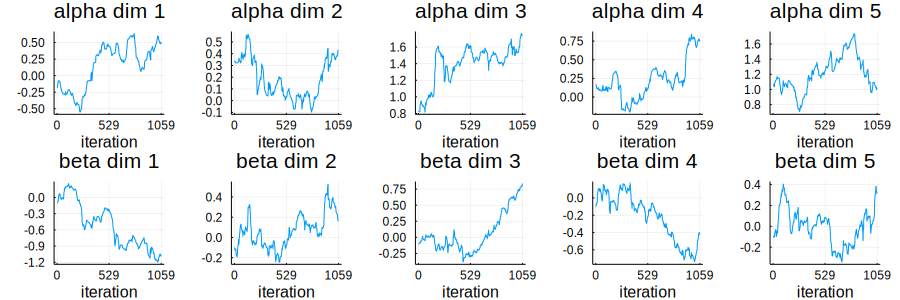

In [8]:
λ_ref = 0.05

start = time()
s_BPS, b_BPS, refreshments, bounces = BPS_ss(X, y, max_attempts, max_bounces, mb_size, α_0, β_0, c, σ_α, σ_β, λ_ref)
print( round((time()-start)/60, 2), " minutes to run \n")
print(refreshments, " refreshments, ", bounces, " bounces.")
plot_traj(s_BPS, Nobs)

4.6% of bounces accepted 
0.87 minutes to run 
404 refreshments, 872 bounces.

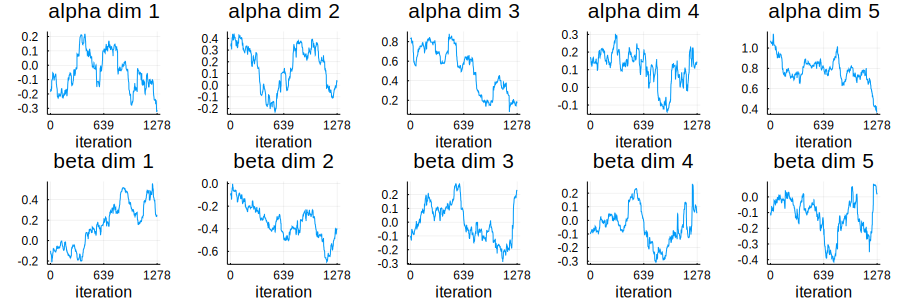

In [9]:
λ_ref = 0.1

start = time()
s_BPS, b_BPS, refreshments, bounces = BPS_ss(X, y, max_attempts, max_bounces, mb_size, α_0, β_0, c, σ_α, σ_β, λ_ref)
print( round((time()-start)/60, 2), " minutes to run \n")
print(refreshments, " refreshments, ", bounces, " bounces.")
plot_traj(s_BPS, Nobs)

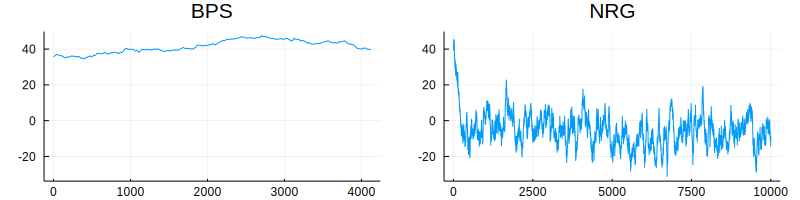

In [12]:
direction = rand(d+Nobs)
plot_projection(ξ_traj, s_BPS, b_BPS, Nobs, direction)